In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from shapely.geometry import Point
plt.style.use('seaborn')

## Find and read all files with data

In [2]:
# find all files with .csv format, except 'legend' file

files = [i for i in os.listdir('.') if i[-4:]=='.csv' and 'legend' not in i]
files

['mi_meteo_14121.csv',
 'mi_meteo_14391.csv',
 'mi_meteo_19004.csv',
 'mi_meteo_19005.csv',
 'mi_meteo_19006.csv',
 'mi_meteo_19019.csv',
 'mi_meteo_19020.csv',
 'mi_meteo_19021.csv',
 'mi_meteo_2001.csv',
 'mi_meteo_2002.csv',
 'mi_meteo_2006.csv',
 'mi_meteo_2008.csv',
 'mi_meteo_5897.csv',
 'mi_meteo_5908.csv',
 'mi_meteo_5909.csv',
 'mi_meteo_5911.csv',
 'mi_meteo_5920.csv',
 'mi_meteo_6030.csv',
 'mi_meteo_6045.csv',
 'mi_meteo_6049.csv',
 'mi_meteo_6064.csv',
 'mi_meteo_6120.csv',
 'mi_meteo_6129.csv',
 'mi_meteo_6131.csv',
 'mi_meteo_6138.csv',
 'mi_meteo_6174.csv',
 'mi_meteo_6179.csv',
 'mi_meteo_6185.csv',
 'mi_meteo_6457.csv',
 'mi_meteo_6502.csv',
 'mi_meteo_6597.csv',
 'mi_meteo_8162.csv',
 'mi_meteo_9341.csv']

In [3]:
#extract station number from names and create new dictionary

stations_data = {}
for i in files:
    data = pd.read_csv(i, header = None, parse_dates = [1])
    data = data.rename(columns = {0: 'station', 1: 'date', 2: 'measure'})
    stations_data[int(re.findall('[\d]+', i)[0])] = data 
    
stations_data[19006]

station                date  measure
0      19006 2013-12-13 17:00:00      258
1      19006 2013-12-13 18:00:00      327
2      19006 2013-12-13 19:00:00      338
3      19006 2013-12-13 20:00:00      314
4      19006 2013-12-13 21:00:00      295
5      19006 2013-12-13 22:00:00      333
6      19006 2013-12-13 23:00:00      340
7      19006 2013-12-14 00:00:00      325
8      19006 2013-12-14 01:00:00      279
9      19006 2013-12-14 02:00:00      339
10     19006 2013-12-14 03:00:00      325
11     19006 2013-12-14 04:00:00      321
12     19006 2013-12-14 05:00:00      283
13     19006 2013-12-14 06:00:00      335
14     19006 2013-12-14 07:00:00      336
15     19006 2013-12-14 08:00:00      341
16     19006 2013-12-14 09:00:00      335
17     19006 2013-12-14 10:00:00      353
18     19006 2013-12-14 11:00:00      321
19     19006 2013-12-14 13:00:00      296
20     19006 2013-12-14 14:00:00      282
21     19006 2013-12-14 15:00:00      292
22     19006 2013-12-14 17:00:00      322
23     19006 2013-12-14 18:00:00      312
24     19006 2013-12-14 19:00:00      320
25     19006 2013-12-14 21:00:00      332
26     19006 2013-12-14 22:00:00       10
27     19006 2013-12-14 23:00:00      310
28     19006 2013-12-15 00:00:00      317
29     19006 2013-12-15 01:00:00       70
..       ...                 ...      ...
680    19006 2013-12-12 09:00:00      350
681    19006 2013-12-12 10:00:00      312
682    19006 2013-12-12 11:00:00      305
683    19006 2013-12-12 12:00:00      251
684    19006 2013-12-12 13:00:00      284
685    19006 2013-12-12 14:00:00      294
686    19006 2013-12-12 15:00:00      274
687    19006 2013-12-12 16:00:00      296
688    19006 2013-12-12 17:00:00      339
689    19006 2013-12-12 18:00:00      350
690    19006 2013-12-12 19:00:00      353
691    19006 2013-12-12 20:00:00      351
692    19006 2013-12-12 22:00:00      344
693    19006 2013-12-12 23:00:00      348
694    19006 2013-12-13 00:00:00      324
695    19006 2013-12-13 01:00:00      340
696    19006 2013-12-13 02:00:00      353
697    19006 2013-12-13 03:00:00      338
698    19006 2013-12-13 04:00:00      305
699    19006 2013-12-13 05:00:00      347
700    19006 2013-12-13 06:00:00      351
701    19006 2013-12-13 07:00:00      327
702    19006 2013-12-13 08:00:00      318
703    19006 2013-12-13 10:00:00      353
704    19006 2013-12-13 11:00:00      300
705    19006 2013-12-13 12:00:00      269
706    19006 2013-12-13 13:00:00      294
707    19006 2013-12-13 14:00:00      293
708    19006 2013-12-13 15:00:00      284
709    19006 2013-12-13 16:00:00      267

[710 rows x 3 columns]

## Create the legend data frame

In [4]:
legend = pd.read_csv('mi_meteo_legend.csv', header = None)
legend = legend.rename(columns={0:'number', 1:'name', 2:'lon', 3: 'lat', 4:'type', 5:'units'})
legend = legend.set_index('number')
legend

name        lon       lat  \
number                                                         
6030                 Milano - via Brera  45.471192  9.187616   
5897                 Milano - via Brera  45.471192  9.187616   
6174                 Milano - via Brera  45.471192  9.187616   
6120                 Milano - via Brera  45.471192  9.187616   
2006              Milano - via Lambrate  45.490051  9.225596   
2008              Milano - via Lambrate  45.490051  9.225596   
2001              Milano - via Lambrate  45.490051  9.225596   
2002              Milano - via Lambrate  45.490051  9.225596   
14391             Milano - via Lambrate  45.490051  9.225596   
6064          Milano - P.zza  Zavattari  45.476089  9.143509   
9341          Milano - P.zza  Zavattari  45.476089  9.143509   
5920          Milano - P.zza  Zavattari  45.476089  9.143509   
6185          Milano - P.zza  Zavattari  45.476089  9.143509   
6138          Milano - P.zza  Zavattari  45.476089  9.143509   
19004         Milano - P.zza  Zavattari  45.476089  9.143509   
19005         Milano - P.zza  Zavattari  45.476089  9.143509   
19006         Milano - P.zza  Zavattari  45.476089  9.143509   
8162                Milano - via Feltre  45.491450  9.242386   
6045        Milano - via Filippo Juvara  45.473622  9.220392   
5908        Milano - via Filippo Juvara  45.473622  9.220392   
6502        Milano - via Filippo Juvara  45.473622  9.220392   
6457        Milano - via Filippo Juvara  45.473622  9.220392   
5909        Milano - via Filippo Juvara  45.473622  9.220392   
6179        Milano - via Filippo Juvara  45.473622  9.220392   
6129        Milano - via Filippo Juvara  45.473622  9.220392   
14121   Milano - via Ippolito Rosellini  45.490043  9.194632   
6049              Milano - viale Marche  45.496067  9.193023   
19021             Milano - viale Marche  45.496067  9.193023   
5911              Milano - viale Marche  45.496067  9.193023   
6597              Milano - viale Marche  45.496067  9.193023   
6131              Milano - viale Marche  45.496067  9.193023   
19019             Milano - viale Marche  45.496067  9.193023   
19020             Milano - viale Marche  45.496067  9.193023   

                        type           units  
number                                        
6030          Wind Direction          degree  
5897             Temperature  Celsius degree  
6174       Relative Humidity               %  
6120              Wind Speed             m/s  
2006           Precipitation              mm  
2008        Global Radiation          W/m^2  
2001             Temperature  Celsius degree  
2002       Relative Humidity               %  
14391             Wind Speed             m/s  
6064          Wind Direction          degree  
9341           Precipitation              mm  
5920             Temperature  Celsius degree  
6185       Relative Humidity               %  
6138              Wind Speed             m/s  
19004             Wind Speed             m/s  
19005             Wind Speed             m/s  
19006         Wind Direction          degree  
8162             Temperature  Celsius degree  
6045          Wind Direction          degree  
5908           Precipitation              mm  
6502    Atmospheric Pressure             hPa  
6457           Net Radiation          W/m^2  
5909             Temperature  Celsius degree  
6179       Relative Humidity               %  
6129              Wind Speed             m/s  
14121          Precipitation              mm  
6049          Wind Direction          degree  
19021         Wind Direction          degree  
5911             Temperature  Celsius degree  
6597       Relative Humidity               %  
6131              Wind Speed             m/s  
19019             Wind Speed             m/s  
19020             Wind Speed             m/s

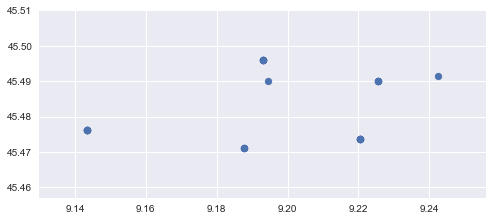

In [5]:
legend = gpd.GeoDataFrame(legend, crs = {'init':'epsg:4326'})
legend = legend.set_geometry([Point(round(legend.iloc[i].lat, 13), round(legend.iloc[i].lon, 13)) for i in range(len(legend))])
legend.plot()
plt.show()

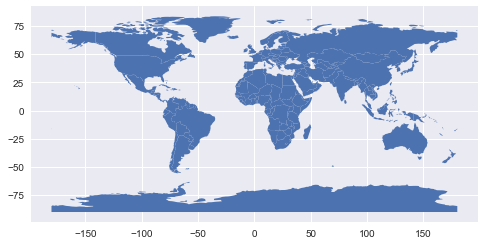

In [6]:
path = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(path)
world.plot()
plt.show()

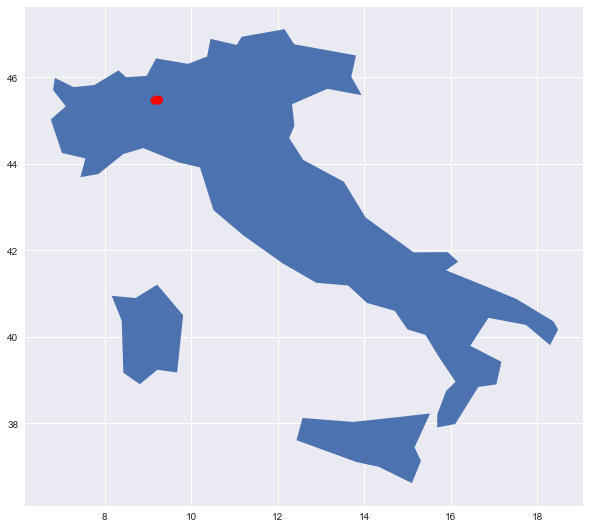

In [7]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
world[world.name == 'Italy'].plot(ax=ax)
legend.plot(ax=ax, color = 'red')
plt.show()


## Get data by measure type

In [23]:
def get_data_by_type(type_):
    stations = legend[legend['type'] == type_]
    data = None
    for num in stations.index:
        if type(data) == type(None):
            data = stations_data[num]
        else:
            data = data.append(stations_data[num])
    return data

def plot_by_station(data, kind = 'line', alpha = 1):
    fig, ax = plt.subplots(1, 1, figsize = (15, 10))
    for station in list(set(data.station)):
        data[data.station==station].plot(ax=ax, x = 'date', y = 'measure', label = str(station), kind=kind, alpha=alpha)
    plt.show()

def hist_by_station(data):
    fig, ax = plt.subplots(1, 1, figsize = (15, 10))
    for station in list(set(data.station)):
        data[data.station==station].measure.hist(ax=ax,  bins = 50, histtype = 'stepfilled', edgecolor = 'k', label = str(station))
    fig.legend()
    plt.show()
    
def bar_by_station(data):
    fig, ax = plt.subplots(1, 1, figsize = (15, 10))
    for station in list(set(data.station)):
        data[data.station==station].boxplot(ax=ax, x = 'date', y = 'measure', label = str(station))
    plt.show()
    
def get_mean_by_date(data):
    fig, ax = plt.subplots(1, 1, figsize = (15, 10))
    mean = data.groupby('date').mean()['measure']
    mean.plot(ax=ax)
    return mean

## Processing temperature data

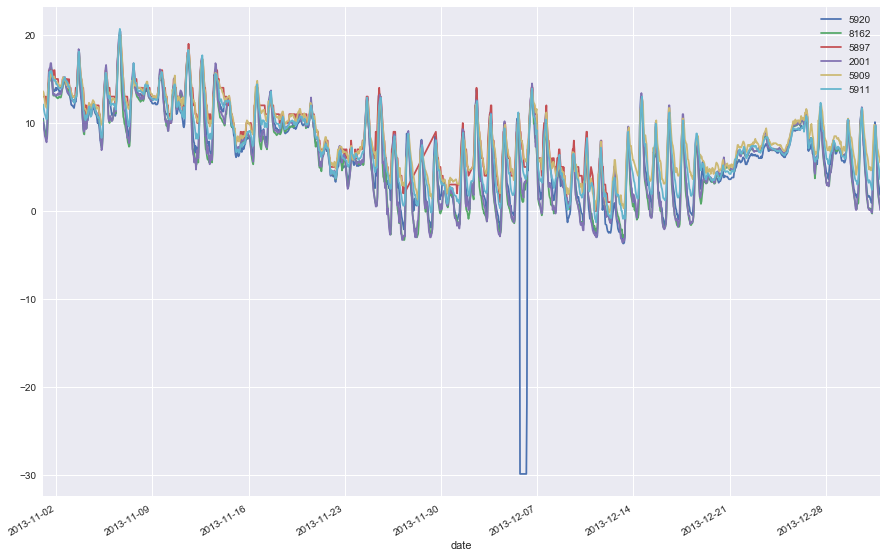

In [9]:
temperature_data = get_data_by_type('Temperature')
plot_by_station(temperature_data)

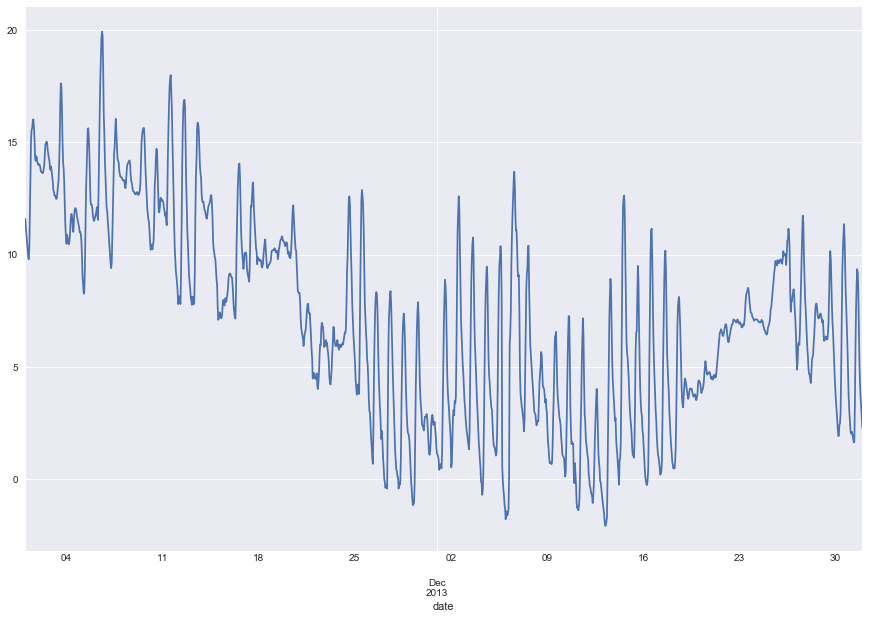

In [10]:
mean_temperature = get_mean_by_date(temperature_data)

## Processing Wind Direction data

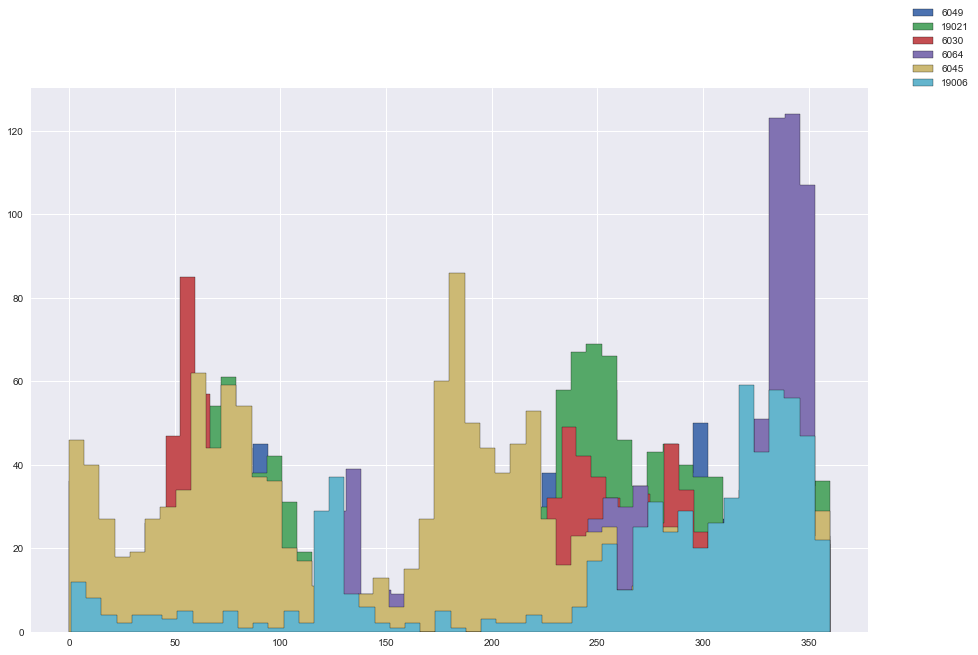

In [11]:
wind_direction = get_data_by_type('Wind Direction')
wind_direction = wind_direction.drop(wind_direction[wind_direction.measure>360].index)
hist_by_station(wind_direction)

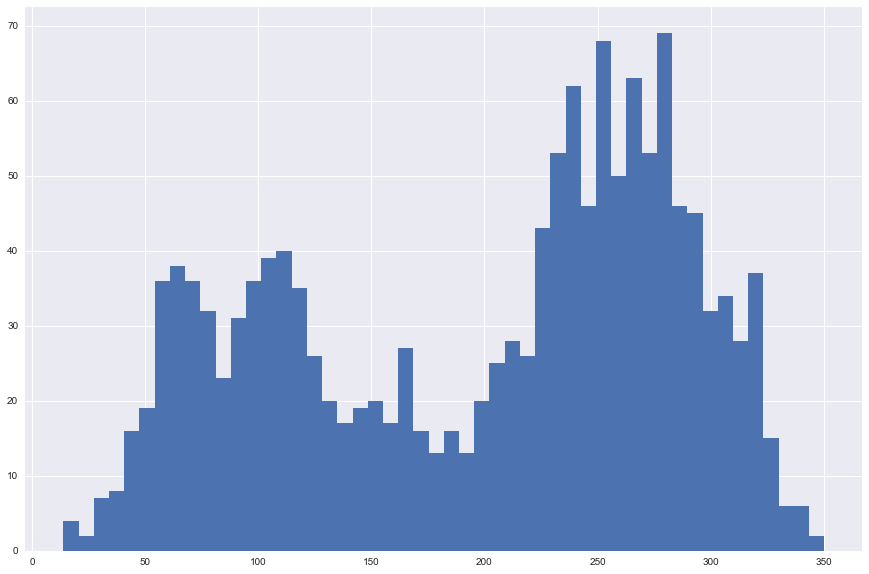

In [12]:
#plot mean temperature date

fig, ax = plt.subplots(1, 1, figsize = (15, 10))
mean_wind_direction = wind_direction.groupby('date').mean()['measure']

mean_wind_direction.hist(ax=ax, bins = 50)

## Relative Humidity Processing

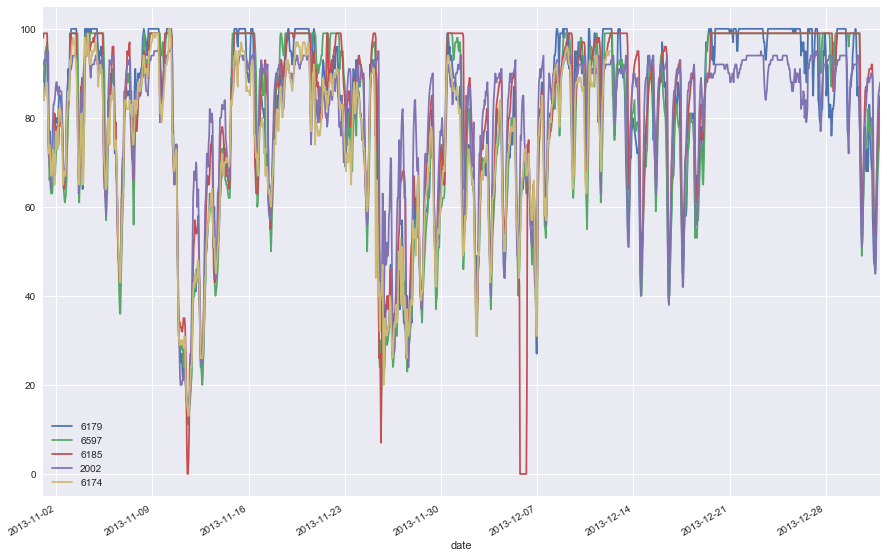

In [13]:
relative_humidity = get_data_by_type('Relative Humidity')
plot_by_station(relative_humidity)

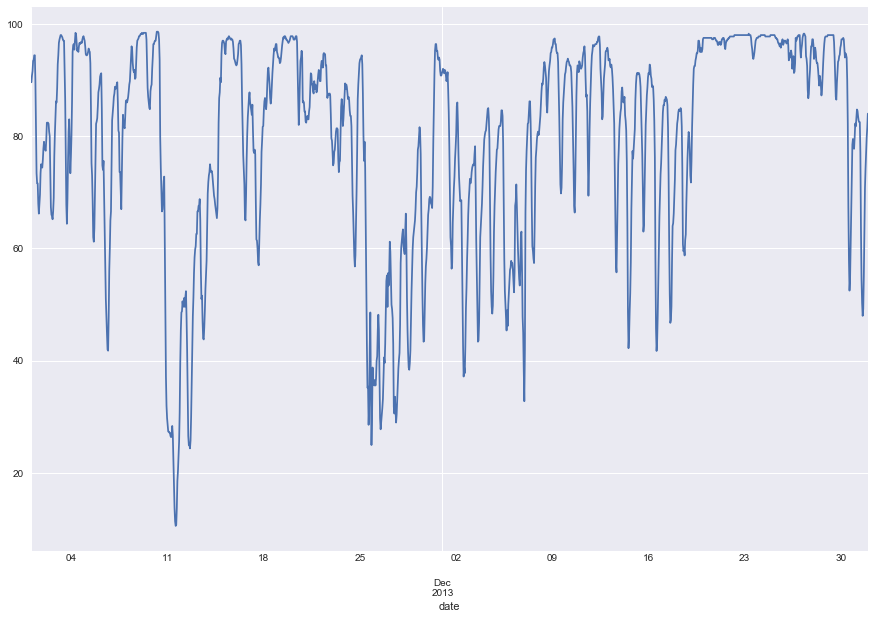

In [14]:
mean_relative_humidity = get_mean_by_date(relative_humidity)

## Wind Speed Processing

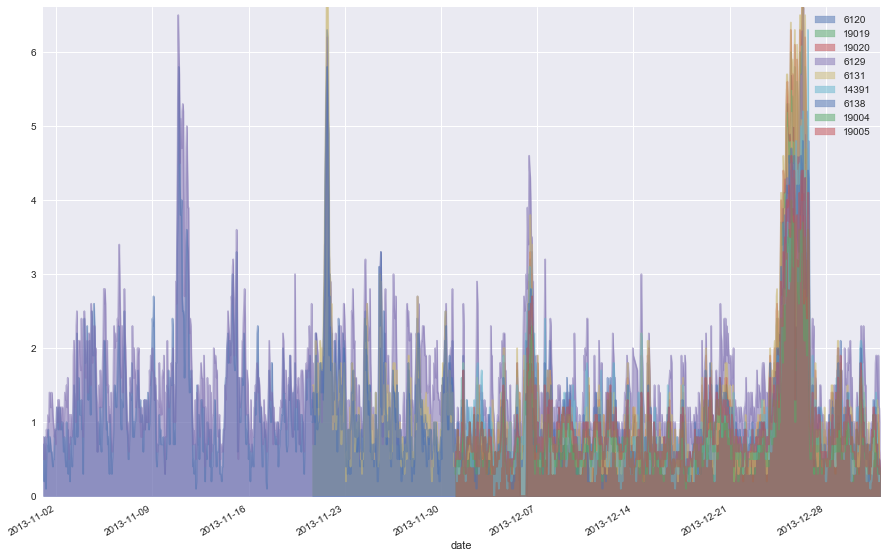

In [43]:
wind_speed = get_data_by_type('Wind Speed')
plot_by_station(wind_speed, kind = 'area', alpha = 0.5)

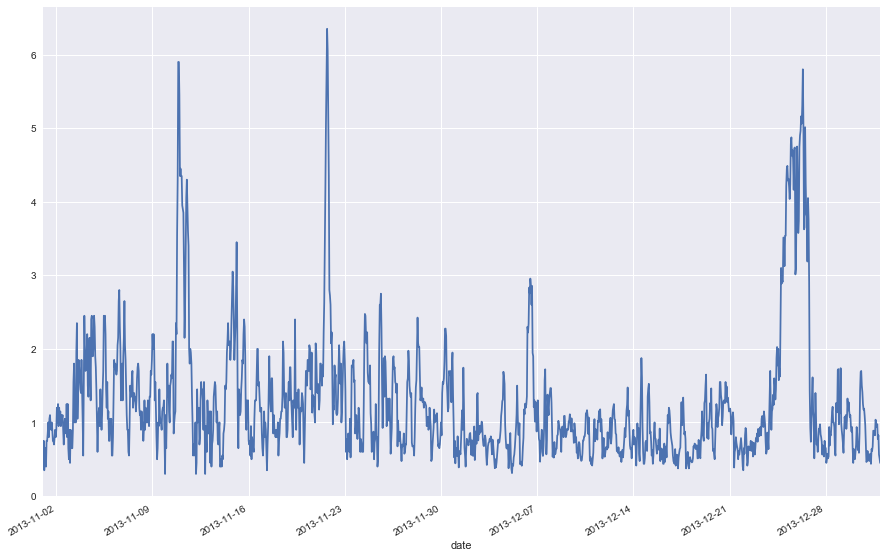

In [16]:
mean_wind_speed = get_mean_by_date(wind_speed)

## Precipitation data processing

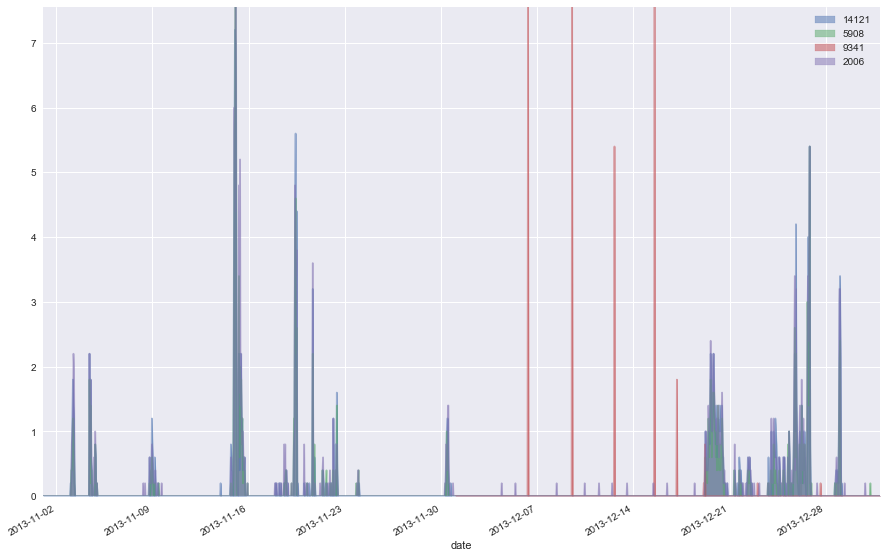

In [24]:
precipitation = get_data_by_type('Precipitation')
plot_by_station(precipitation, kind = 'area', alpha = 0.5)

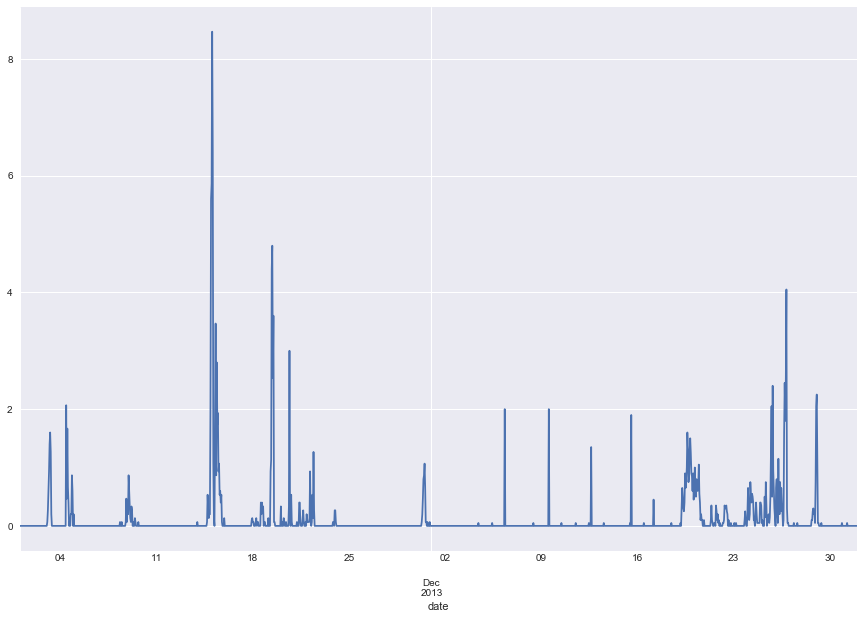

In [39]:
mean_precipitation = get_mean_by_date(precipitation)

## Global Radiation Processing

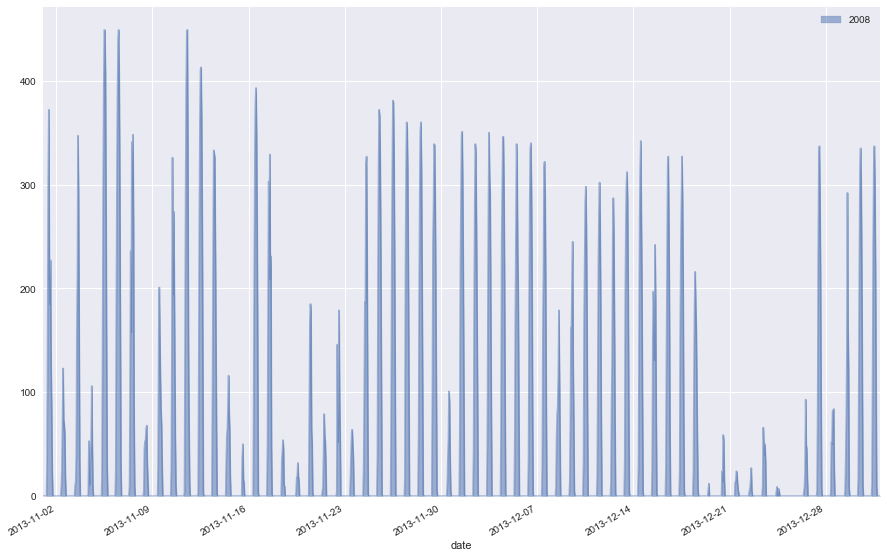

In [40]:
precipitation = get_data_by_type('Global Radiation')
plot_by_station(precipitation, kind = 'area', alpha = 0.5)

## Atmospheric Pressure Processing

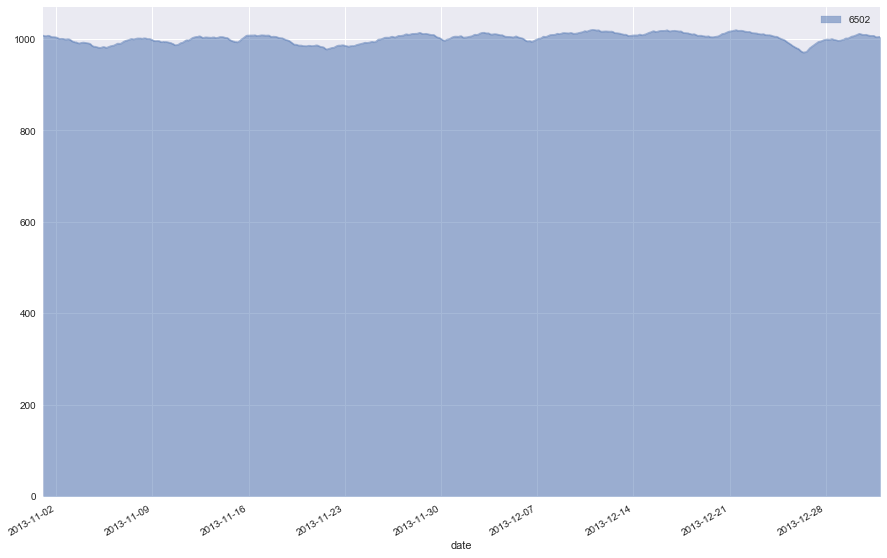

In [42]:
precipitation = get_data_by_type('Atmospheric Pressure')
plot_by_station(precipitation, kind = 'area', alpha = 0.5)

## Net Radiation Processing

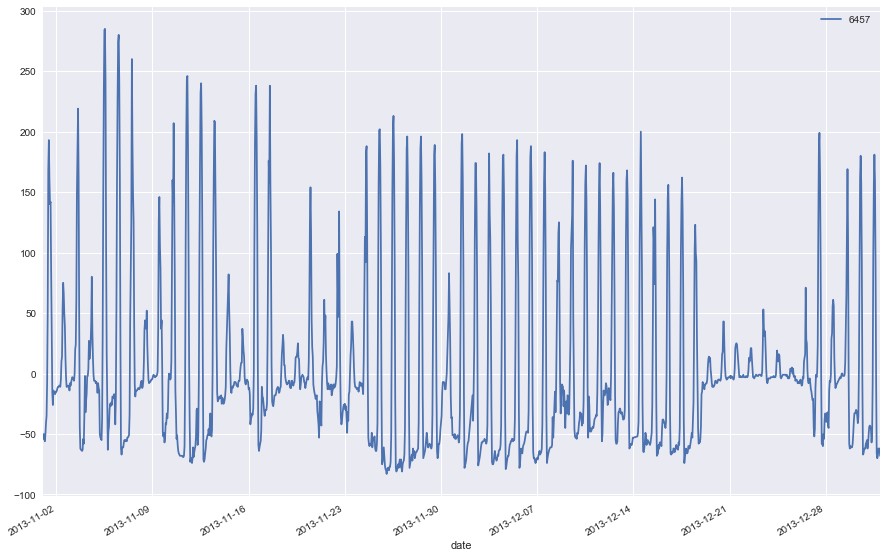

In [45]:
precipitation = get_data_by_type('Net Radiation')
plot_by_station(precipitation)

# Plot All Data By Station

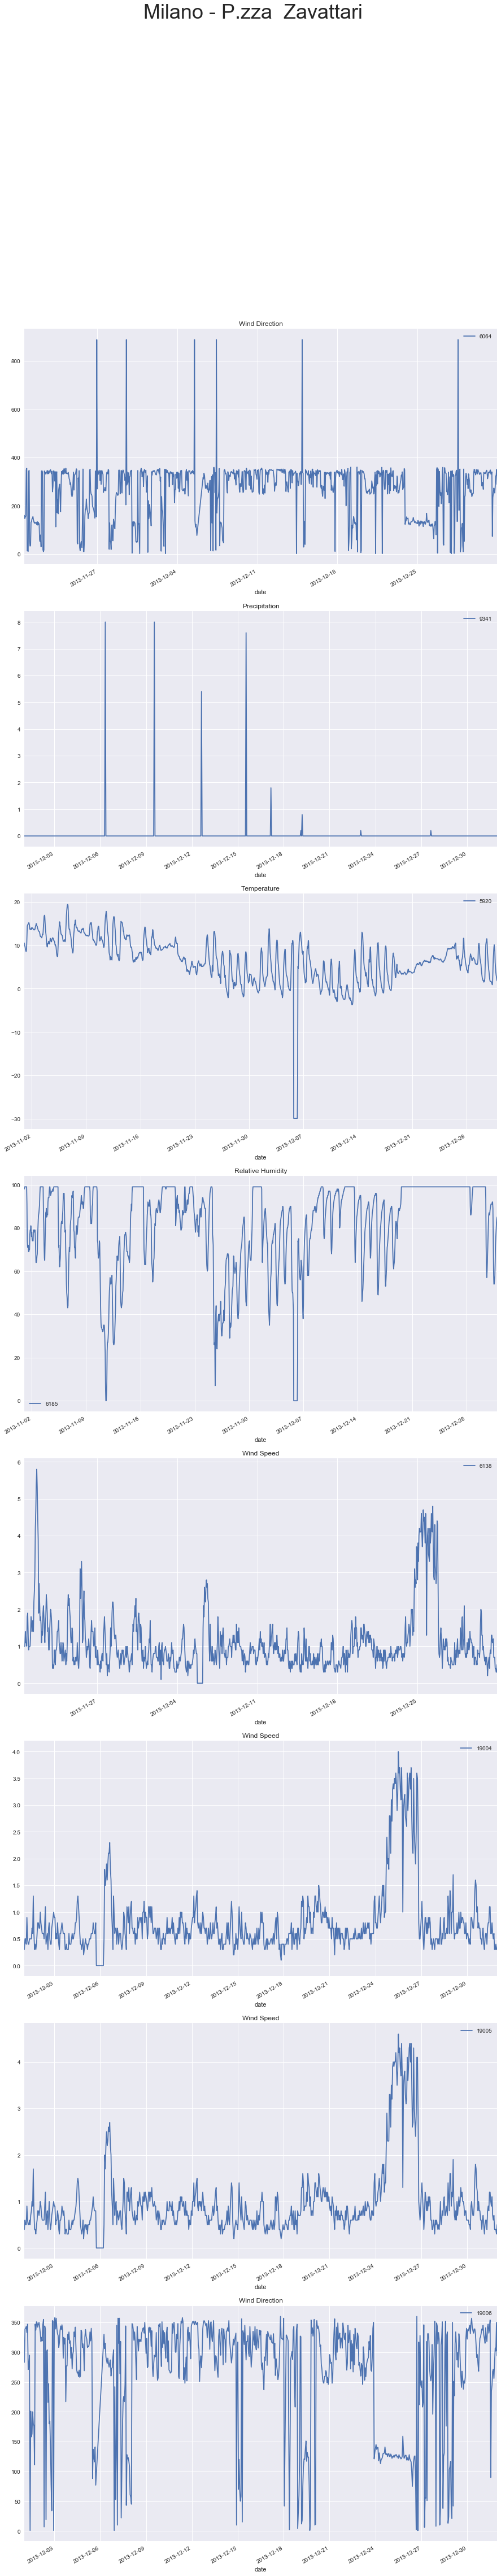

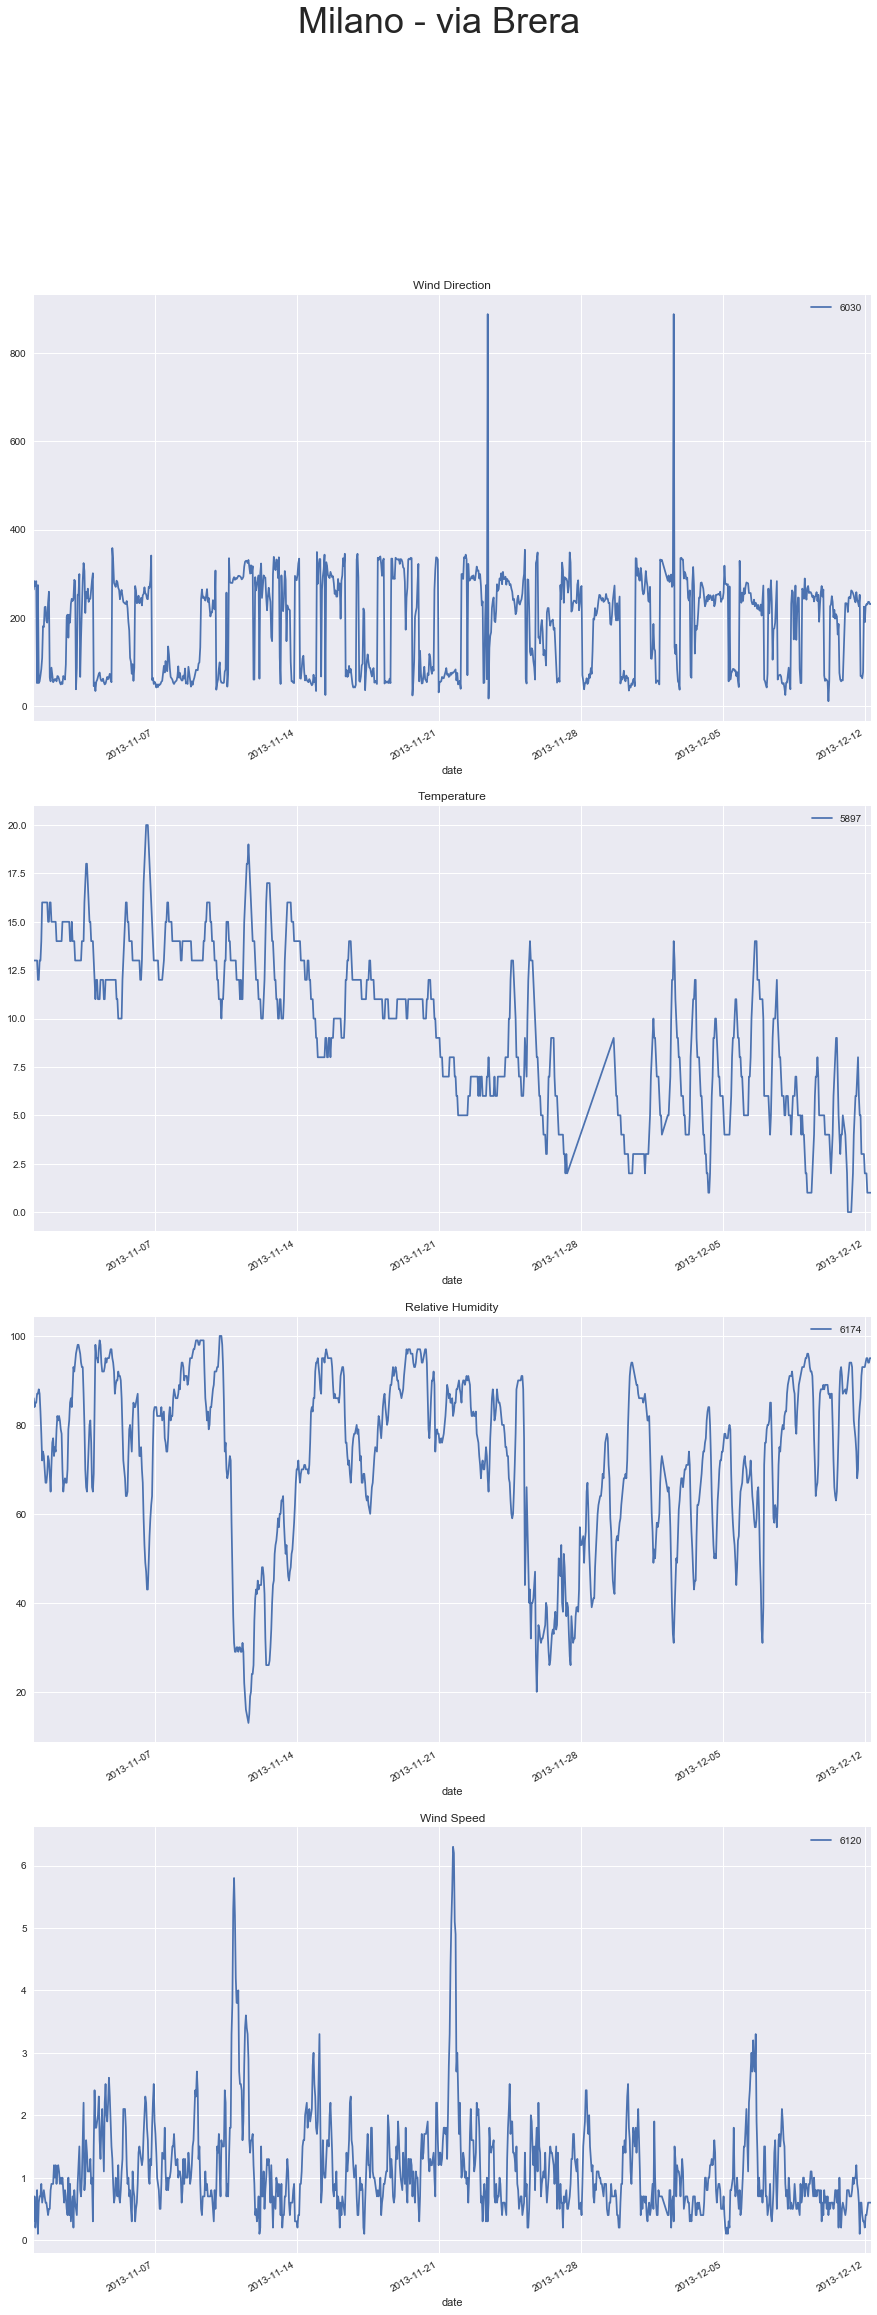

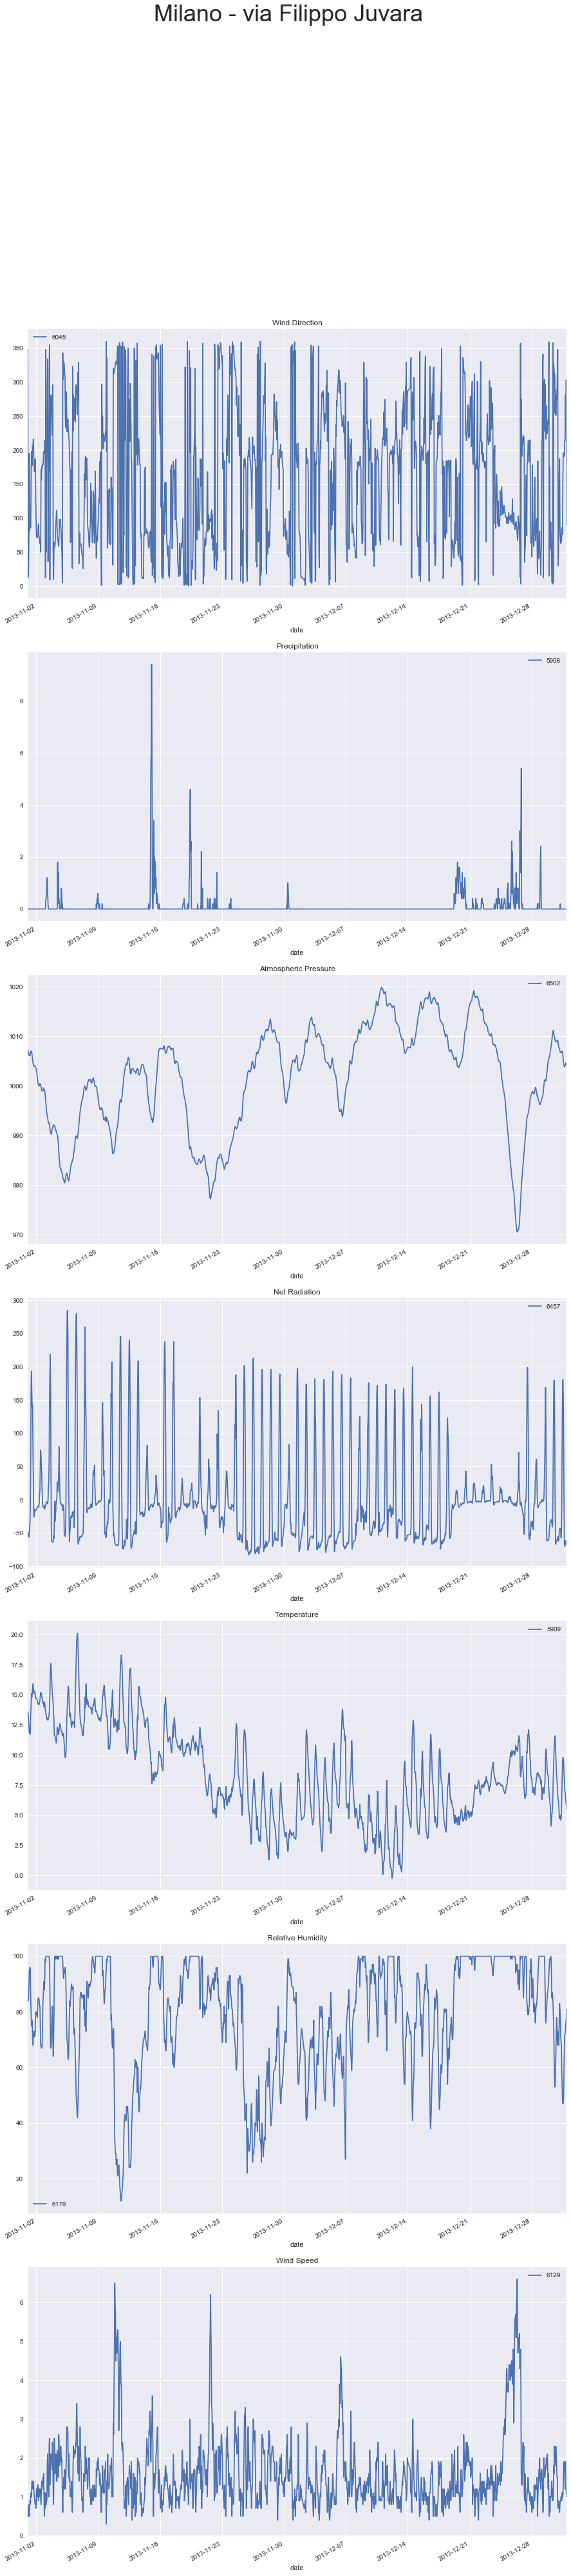

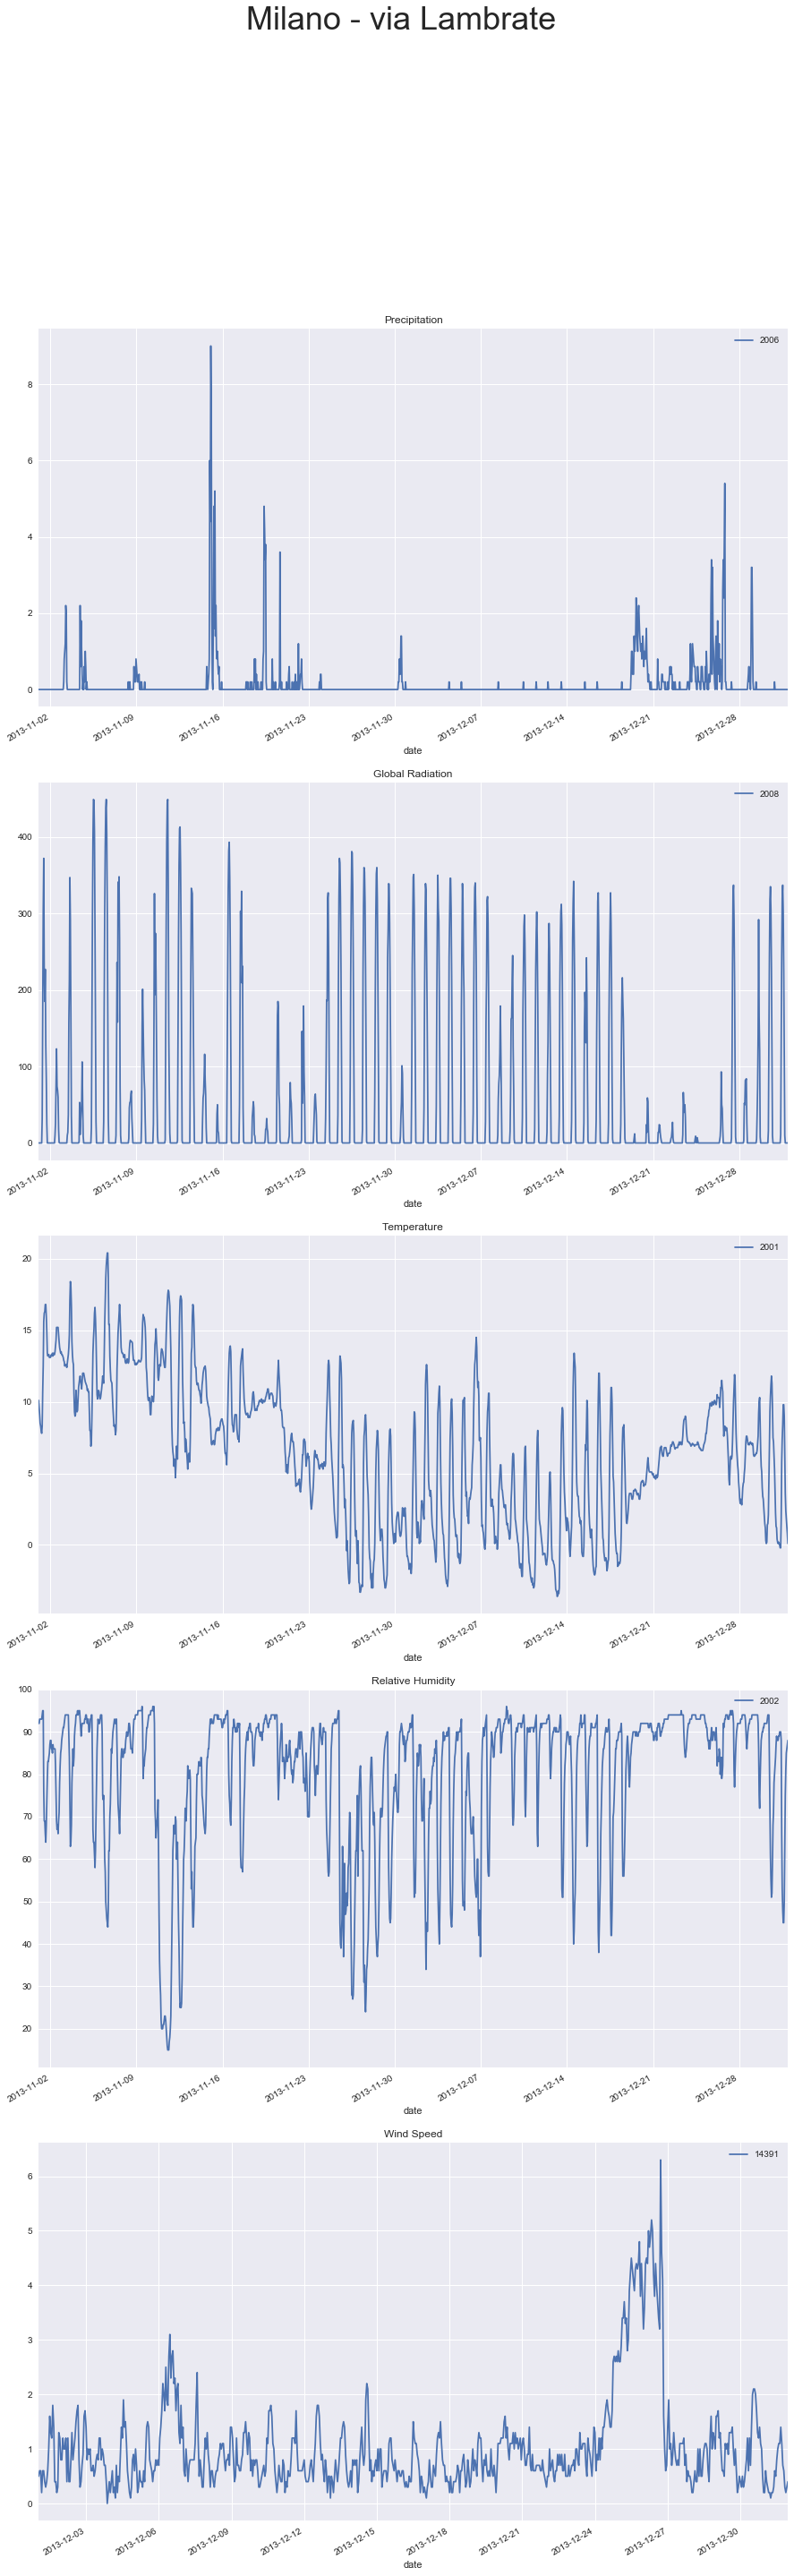

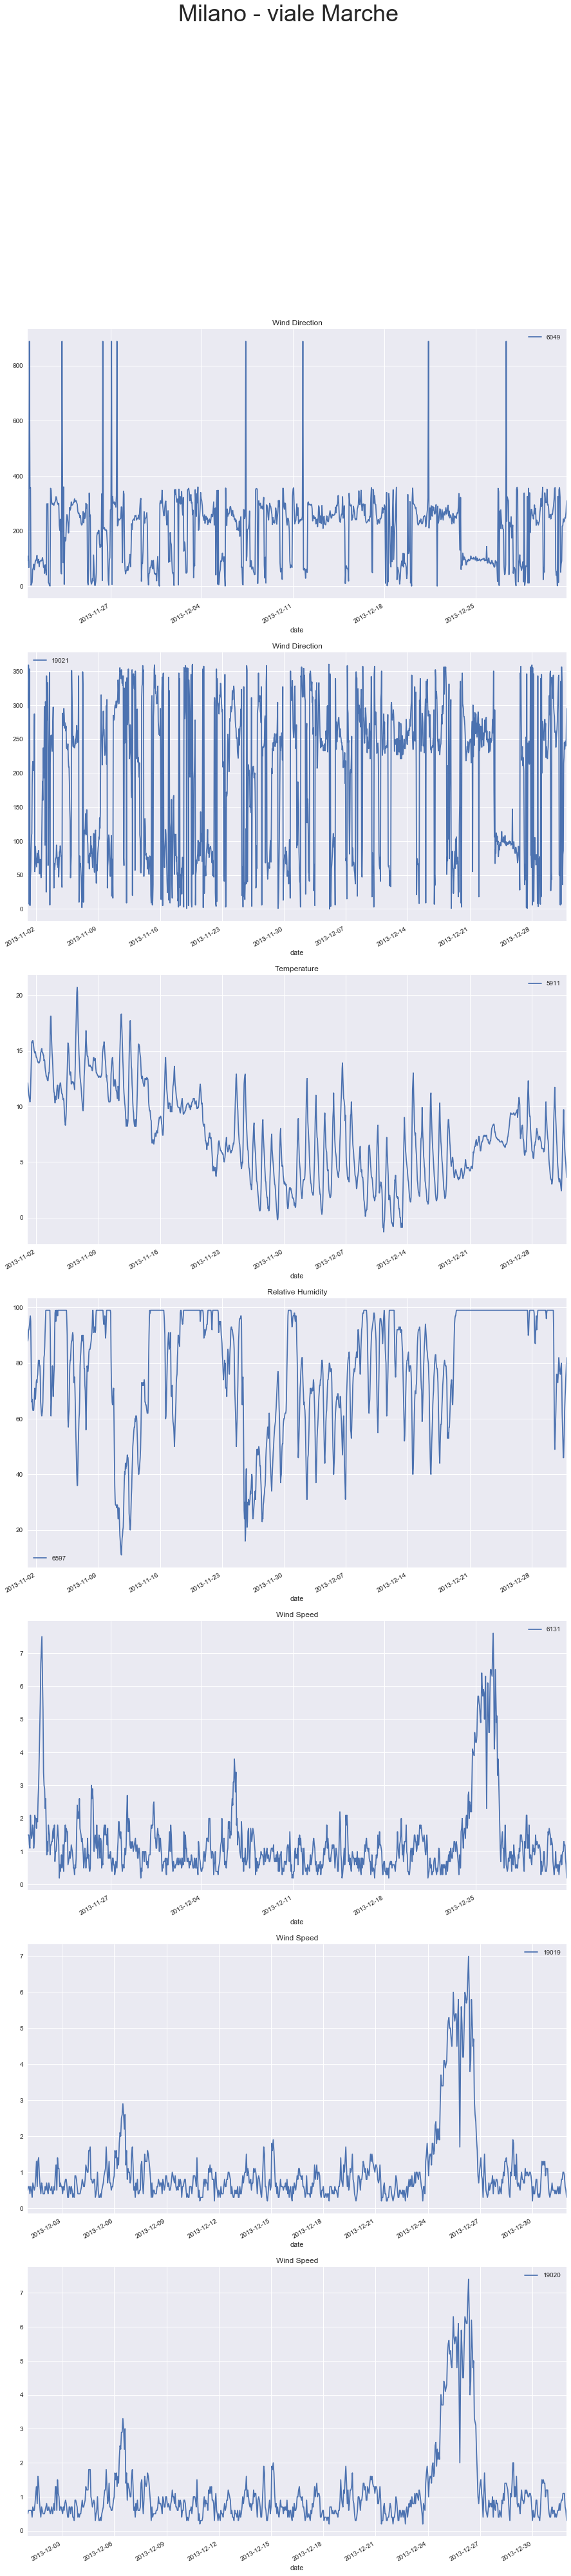

In [66]:
#get unique station names
station_names = legend.groupby(legend.name).sum().index

for station in station_names:
    leg = legend[legend.name == station]
    if len(leg)!=1:
        fig, ax = plt.subplots( len(leg), 1, figsize = (15, 10*len(leg)))
        fig.suptitle(station, fontsize = 36)
        for count, i in enumerate(leg.index):
            data = get_data_by_type(leg.loc[i]['type'])
            data = data[data.station==i]
            data.plot(ax=ax[count], x = 'date', y = 'measure', label = str(i))
            ax[count].set_title(leg.loc[i]['type'])
        plt.show()
        fig.savefig(f"{station}.png")

## Create Rose Wind Plot For Each Station

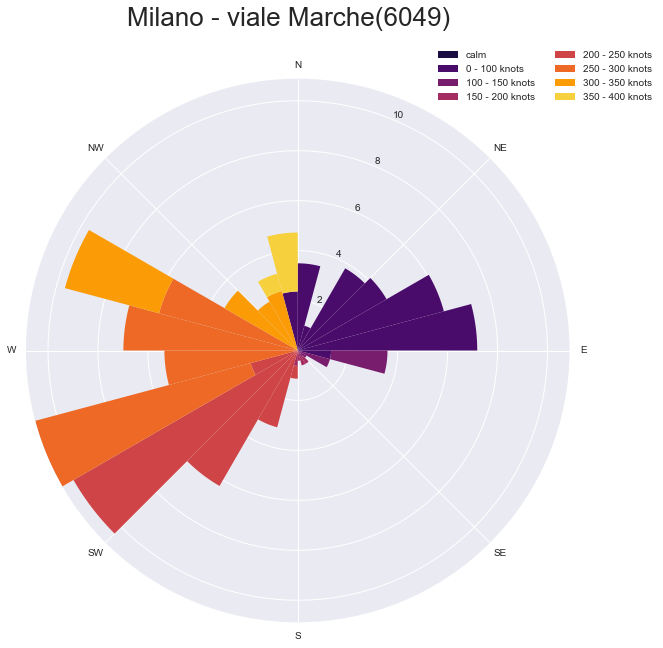

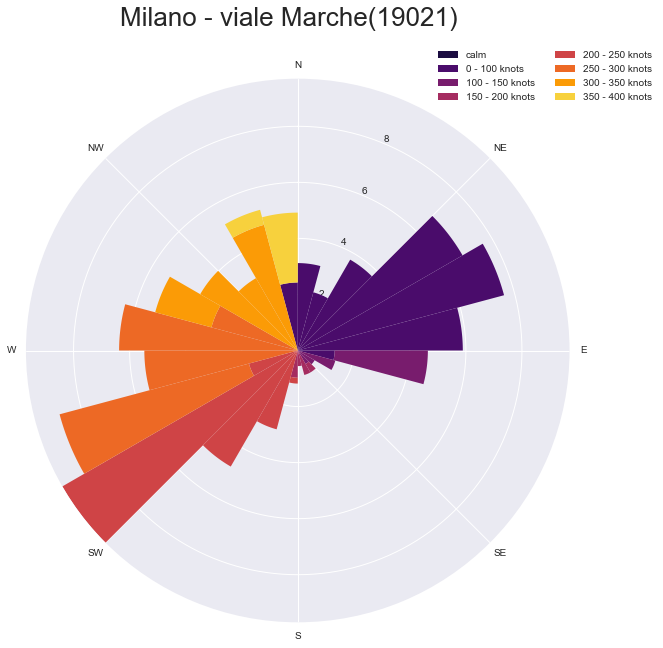

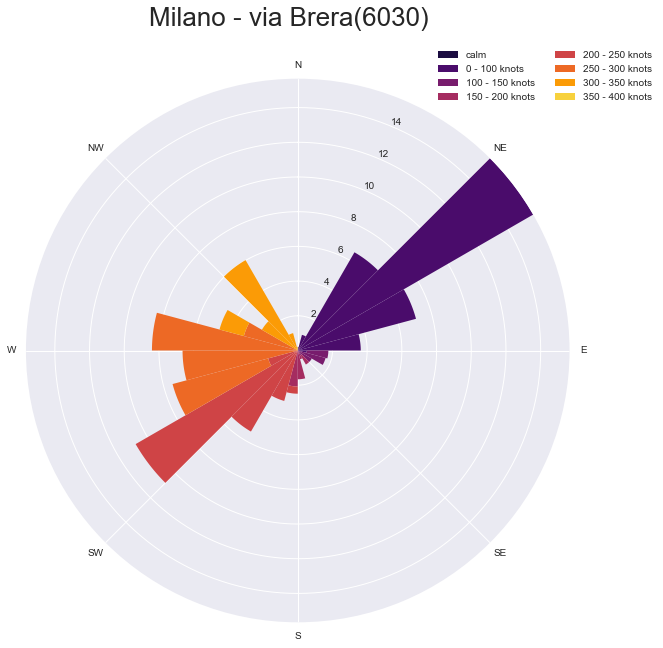

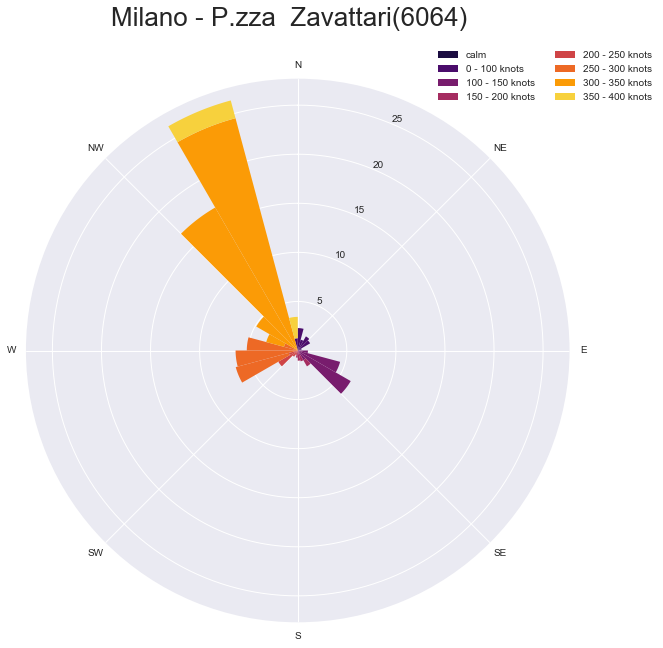

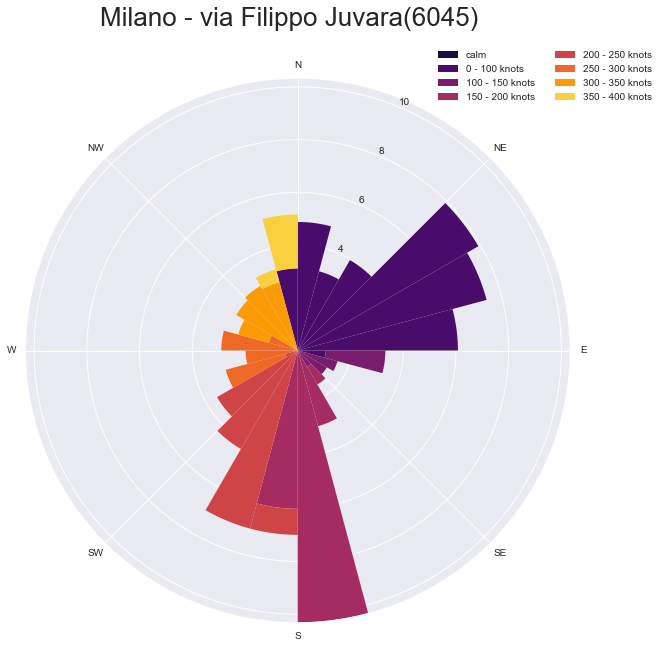

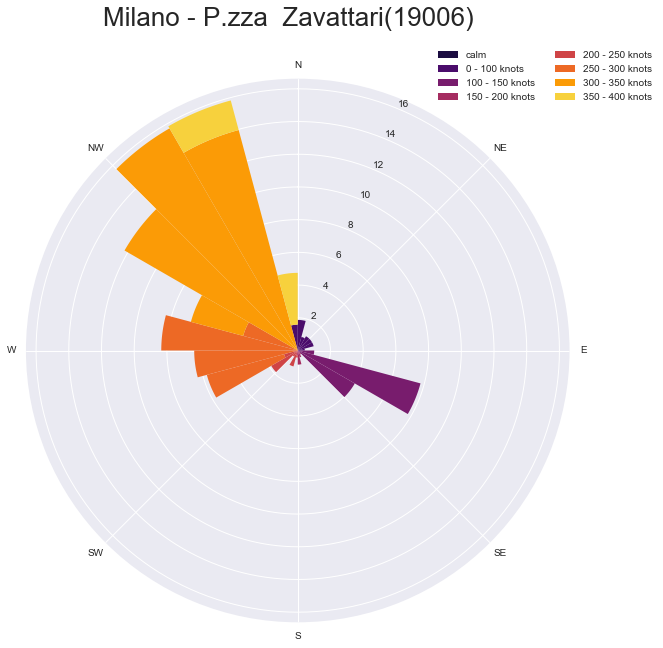

In [104]:
import numpy, pandas, seaborn
import matplotlib.pyplot as pyplot



def speed_labels(bins, units):   
    labels = []
    for left, right in zip(bins[:-1], bins[1:]):
        if left == bins[0]:
            labels.append('calm'.format(right))
        elif numpy.isinf(right):
            labels.append('>{} {}'.format(left, units))
        else:
            labels.append('{} - {} {}'.format(left, right, units))

    return list(labels)

def _convert_dir(directions, N=None):
    if N is None:
        N = directions.shape[0]
    barDir = directions * numpy.pi/180. - numpy.pi/N
    barWidth = 2 * numpy.pi / N
    return barDir, barWidth


for num in list(set(wind_direction.station)):
    wd = wind_direction[wind_direction.station == num]

    total_count = wd.shape[0]
    calm_count = wd.query("measure == 0").shape[0]


    spd_bins = [-1, 0, 100, 150, 200, 250, 300, 350, 400, 450, 500, numpy.inf]
    spd_labels = speed_labels(spd_bins, units='knots')

    dir_bins = numpy.arange(-7.5, 370, 15)
    dir_labels = (dir_bins[:-1] + dir_bins[1:]) / 2

    rose = (
        wd.assign(WindSpd_bins=lambda df:
                pandas.cut(df['measure'], bins=spd_bins, labels=spd_labels, right=True)
             )
            .assign(WindDir_bins=lambda df:
                pandas.cut(df['measure'], bins=dir_bins, labels=dir_labels, right=False)
             )
            .replace({'WindDir_bins': {360: 0}})
            .groupby(by=['WindSpd_bins', 'WindDir_bins'])
            .size()
            .unstack(level='WindSpd_bins')
            .fillna(0)
            .assign(calm=lambda df: calm_count / df.shape[0])
            .sort_index(axis=1)
            .applymap(lambda x: x / total_count * 100)
    )


    def wind_rose(rosedata, wind_dirs, palette=None):
        if palette is None:
            palette = seaborn.color_palette('inferno', n_colors=rosedata.shape[1])

        bar_dir, bar_width = _convert_dir(wind_dirs)

        fig, ax = pyplot.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
        fig.suptitle(f"{legend.loc[num]['name']}({str(num)})", fontsize = 26)
        ax.set_theta_direction('clockwise')
        ax.set_theta_zero_location('N')

        for n, (c1, c2) in enumerate(zip(rosedata.columns[:-1], rosedata.columns[1:])):
            if n == 0:
                # first column only
                ax.bar(bar_dir, rosedata[c1].values, 
                       width=bar_width,
                       color=palette[0],
                       edgecolor='none',
                       label=c1,
                       linewidth=0)

            # all other columns
            ax.bar(bar_dir, rosedata[c2].values, 
                   width=bar_width, 
                   bottom=rosedata.cumsum(axis=1)[c1].values,
                   color=palette[n+1],
                   edgecolor='none',
                   label=c2,
                   linewidth=0)

        leg = ax.legend(loc=(0.75, 0.95), ncol=2)
        xtl = ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

        return fig

    directions = numpy.arange(0, 360, 15)
    fig = wind_rose(rose, directions)